In [60]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import sys
import pandas as pd
from os import listdir
from os.path import isfile, join

In [102]:
beat_dyn = pd.read_csv('./csvs/M06-1beat_dynNORM.csv')
beat_time = pd.read_csv('./csvs/M06-1beat_time.csv')

In [113]:
np.array(beat_dyn['pid1263-01']).mean()

0.4801203006231453

In [23]:
time = np.array(beat_time['pid1263-01'])[336] // 60
num_beats = len(beat_time)
tempo = num_beats // time

In [24]:
tempo

112.0

In [58]:
pianist_mapping = pd.read_csv('./pianistID_name.csv')
mazurka_mapping = pd.read_csv('./mazurka-discography.csv', sep='\t')

In [51]:
pianist_dict = dict(pianist_mapping.to_dict('split')['data'])

In [59]:
mazurka_mapping

,opus,key,performer,year,time,seconds,label,pid,status
0,6.1,F# min,Ashkenazy,1981,3:14,194,Decca 448 086-2,9058-01,-
1,6.1,F# min,Bacha,1997,2:46,166,Forlane 126817,9166c-03,-
2,6.1,F# min,Barbosa,1983,2:30,150,Centaur CRC2098/9,9174-01,-
3,6.1,F# min,Biret,1990,3:29,209,Naxos 8.550359,9062-01,-
4,6.1,F# min,Blet,2003,3:31,211,Marcal MA030501,9103-01,-
...,...,...,...,...,...,...,...,...,...
2726,68.4,F min,Sofronitsky,1961,1:44,104,Classound 001-026,9113-14,-
2727,68.4,F min,Sztompka,1959,2:03,123,Muza PNOD 313 A/B,9170b-22,-
2728,68.4,F min,Uninsky,1959,2:01,121,Philips 442 574-2,9061b-17,-
2729,68.4,F min,Vardi,1988,3:26,206,Carriere Classics 21.0017,9173-23,-


In [75]:
def load_dir(path):
    files = os.listdir(path)
    return files

# piece is in form op-no
# ie: "06-1" for opus 6 no 1
def load_mazurka(piece):
    dyn_file = f'M{piece}beat_dynNORM.csv'
    beat_file = f'M{piece}beat_time.csv'
    beat_dyn = pd.read_csv(f'./csvs/beat_dyn/{dyn_file}')
    beat_time = pd.read_csv(f'./csvs/beat_time/{beat_file}')
    return (beat_dyn, beat_time)

In [97]:
beat_dyn, beat_time = load_mazurka('06-2')


In [150]:
# Mazurka is response from load_mazurka(beat_dyn, beat_time)
def get_pianist_data(mazurka, pianist_name):
    pid = f'pid{pianist_dict[pianist_name]}'
    dyn, time = mazurka
    piece_pids = list(dyn)
    for i in range(len(piece_pids)):
        piece_pid = piece_pids[i]
        if piece_pid.startswith(pid):
            piece_time, dyn_time = time[piece_pid], dyn[piece_pid]
            
            avg_dyn = np.array(dyn_time).mean()
            print(pid)
            num_beats = len(piece_time)
            piece_length = np.array(piece_time)[num_beats - 1] / 60
            tempo = num_beats // piece_length
            
            return (tempo, avg_dyn)
    print("No performer found!")
    return None

In [151]:
m06_2 = load_mazurka('06-2')
vardi_dyn = get_pianist_data(m06_2, "Vardi")

pid9173


In [152]:
vardi_dyn

(111.0, 0.4701404027187501)

In [133]:
def plot_performance(data):
    plt.ylabel('Volume(sones)')
    plt.xlabel('Tempo(bpm)')
    plt.plot(data[0], data[1], 'ro')

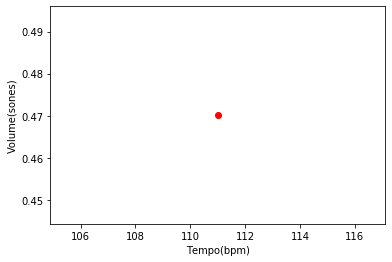

In [157]:
plot_performance(vardi_dyn)

In [159]:
biret_dyn = get_pianist_data(m06_2, "Cortot")

No performer found!


In [156]:
biret_dyn

(113.0, 0.5278965523958333)

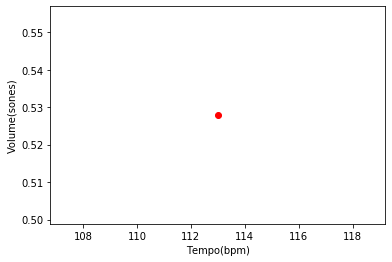

In [158]:
plot_performance(biret_dyn)